## Aula 22 - Wavelets

In [1]:
%matplotlib inline
import cv2 # OpenCV
import matplotlib.pyplot as plt # Matplotlib
import numpy as np # Numpy
import pywt

In [2]:
!wget https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/cat.jpg

--2021-07-12 18:37:34--  https://raw.githubusercontent.com/wlcosta/es235_pdi/master/utils/cat.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 134871 (132K) [image/jpeg]
Saving to: ‘cat.jpg’

cat.jpg             100%[===================>] 131.71K  --.-KB/s    in 0.04s   

2021-07-12 18:37:34 (3.45 MB/s) - ‘cat.jpg’ saved [134871/134871]



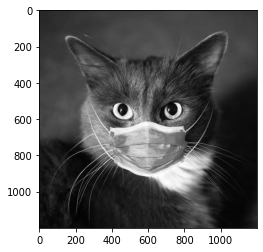

In [4]:
img = cv2.imread('cat.jpg', 0)
plt.imshow(img, 'gray')

### 22.1 Compressão de imagem

Usaremos o Wavelet chamado de [Daubechies wavelet](https://en.wikipedia.org/wiki/Daubechies_wavelet). Para realizar a decomposição usaremos a função [wavedec2](https://pywavelets.readthedocs.io/en/latest/ref/2d-dwt-and-idwt.html#d-multilevel-decomposition-using-wavedec2).

In [5]:
n = 2 # nivel de decomposição
w = 'db1' # tipo do wavelet
coeffs = pywt.wavedec2(img, wavelet=w, level=n)
coeffs

[array([[172.  , 172.  , 172.  , ..., 219.  , 219.  , 214.  ],
        [172.  , 172.  , 172.  , ..., 225.  , 219.  , 214.  ],
        [170.  , 170.  , 170.  , ..., 224.  , 216.  , 216.  ],
        ...,
        [ 41.5 ,  41.5 ,  54.  , ..., 120.  , 122.  , 127.5 ],
        [ 47.  ,  42.  ,  43.75, ..., 125.  , 121.75, 127.  ],
        [ 47.  ,  42.  ,  36.  , ..., 125.  , 127.  , 132.75]]),
 (array([[ 0.  ,  0.  ,  0.  , ..., -1.  ,  0.  ,  0.  ],
         [ 0.  ,  0.  ,  0.  , ..., -1.  ,  0.  ,  0.  ],
         [ 2.  ,  2.  ,  2.  , ...,  0.  ,  0.  ,  0.  ],
         ...,
         [ 2.  ,  2.  ,  2.5 , ...,  0.  , -0.5 , -1.  ],
         [ 0.  ,  0.  ,  1.25, ...,  0.  , -0.75, -1.  ],
         [ 0.  ,  0.  ,  1.5 , ...,  0.  , -1.5 , -1.25]]),
  array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  1.  ,  2.  ],
         [ 0.  ,  0.  ,  0.  , ...,  0.  ,  1.  ,  2.  ],
         [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
         ...,
         [ 3.  , -3.  , -0.5 , ...,  0.  , -1.5 , -1.  

Como temos valores com uma variancia muito grande, vamos normalizar cada coeficiente.

In [12]:
# normalize each coefficient array independently for better visibility
coeffs[0] /= np.abs(coeffs[0]).max()
for detail_level in range(n):
    coeffs[detail_level + 1] = [d/np.abs(d).max() for d in coeffs[detail_level + 1]]

In [13]:
arr, coeff_slices = pywt.coeffs_to_array(coeffs)

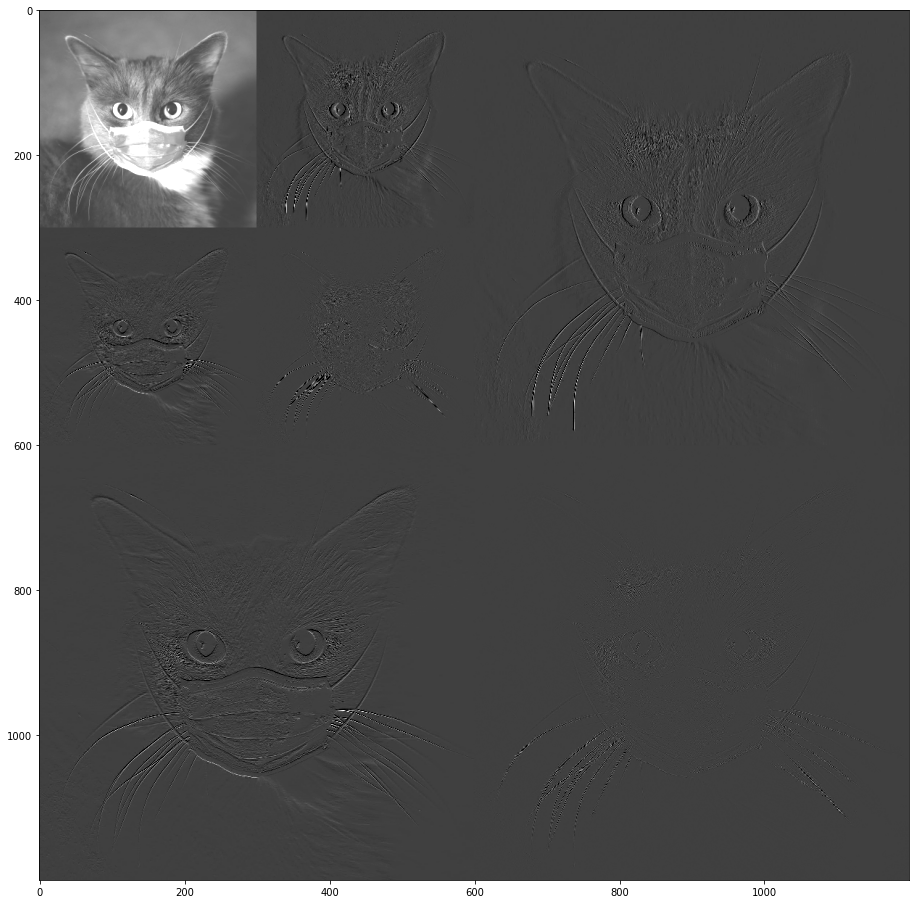

In [19]:
fig = plt.figure(figsize=(18,16))
plt.imshow(arr, 'gray', vmin=-0.25, vmax=0.75)

Para realizar a transformação de Wavelet inversa, usaremos o método [waverec2](https://pywavelets.readthedocs.io/en/latest/ref/2d-dwt-and-idwt.html#d-multilevel-reconstruction-using-waverec2).

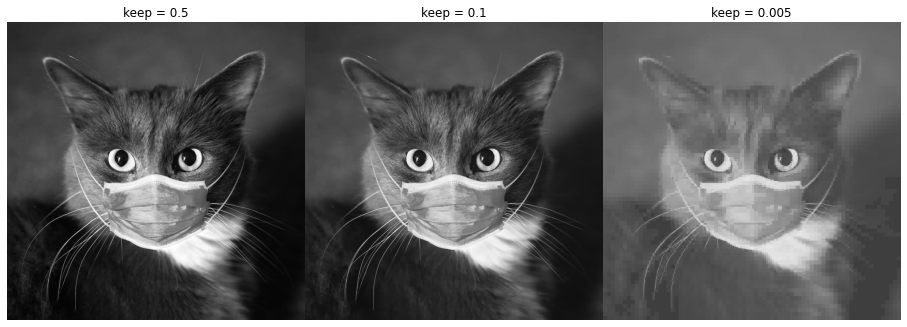

In [26]:
n = 4 # nivel de decomposição
w = 'db1' # tipo do wavelet
coeffs = pywt.wavedec2(img, wavelet=w, level=n)
coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)
coeff_sorted = np.sort(np.abs(coeff_arr.reshape(-1)))

fig, axs = plt.subplots(1, 3, figsize=(16, 9), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

for i, keep in enumerate([0.5, 0.1, 0.005]):
  thresh = coeff_sorted[int(np.floor((1-keep) * len(coeff_sorted)))]
  ind = np.abs(coeff_arr) > thresh
  filt = coeff_arr * ind

  coeff_filtered = pywt.array_to_coeffs(filt, coeff_slices, output_format='wavedec2')
  
  # Plot reconstruction
  recon = pywt.waverec2(coeff_filtered, wavelet=w)
  axs[i].imshow(recon, 'gray')
  axs[i].set_title('keep = ' + str(keep))
  axs[i].axis('off')

### 22.2 Obtenção de características

Neste exemplo, faremos uso da função [dwt2](https://pywavelets.readthedocs.io/en/latest/ref/2d-dwt-and-idwt.html#single-level-dwt2) que realiza a transformada de Wavelet discreta em 2D.

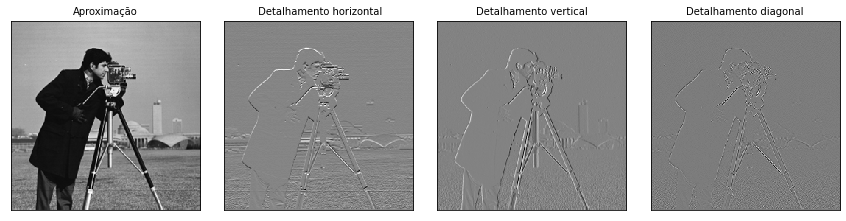

In [27]:
import pywt.data
original = pywt.data.camera()

titles = ['Aproximação', ' Detalhamento horizontal',
          'Detalhamento vertical', 'Detalhamento diagonal']
coeffs2 = pywt.dwt2(original, 'bior1.3')
(cA, (cH, cV, cD)) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([cA, cH, cV, cD]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()